In [2]:
import numpy as np
import pandas as pd 

In [2]:
df_all_encoder = pd.read_csv("/kaggle/input/pentabd-transliteration-dataset-all-combined/all_encoder.csv")
df_all_encoder.dataset.value_counts()

dataset
penta_trickbd_unannotated           105527
mendeley_banglish                    79197
penta_trickbd_external               27518
bangla_sentiment                     13081
penta_trickbd_internal                8146
mendeley_fp                           5055
bhasha_abhijnaanam                    4170
springer_autobacktransliteration      3033
Name: count, dtype: int64

In [3]:
df_all_encoder.shape

(245727, 4)

In [7]:
df_all_encoder.columns

Index(['id', 'dataset', 'text_transliterated'], dtype='object')

In [5]:
# df_all_encoder.drop(columns=['text_bengali'], inplace=True)

In [6]:
# df_all_encoder.to_csv("all_encoder.csv", index=False)

In [4]:
105527+27518+8146

141191

In [5]:
df_train = pd.read_csv("/kaggle/input/pentabd-transliteration-dataset-all-combined/train.csv")
df_train.shape

(38705, 4)

In [6]:
df_train.columns

Index(['id', 'dataset', 'text_transliterated', 'text_bengali'], dtype='object')

In [7]:
df_train.dataset.value_counts()

dataset
penta_trickbd_external              23474
penta_trickbd_internal               8139
bhasha_abhijnaanam                   4153
springer_autobacktransliteration     2939
Name: count, dtype: int64

In [8]:
df_test = pd.read_csv("/kaggle/input/pentabd-transliteration-dataset-all-combined/test.csv")
df_test.shape

(2500, 4)

In [9]:
df_test.dataset.value_counts()

dataset
penta_trickbd_external    2500
Name: count, dtype: int64

In [10]:
23516+2500+1500

27516

In [11]:
df_val = pd.read_csv("/kaggle/input/pentabd-transliteration-dataset-all-combined/val.csv")
df_val.shape

(1500, 4)

In [12]:
df_val.dataset.value_counts()

dataset
penta_trickbd_external    1500
Name: count, dtype: int64

In [13]:
df = pd.concat([df_test, df_val, df_train], ignore_index=True)
df.shape

(42705, 4)

In [14]:
df.dataset.value_counts()

dataset
penta_trickbd_external              27474
penta_trickbd_internal               8139
bhasha_abhijnaanam                   4153
springer_autobacktransliteration     2939
Name: count, dtype: int64

In [15]:
27474+8139

35613

In [16]:
df_4 = df[df['text_bengali'].str.split().str.len() == 4]
df_4

,id,dataset,text_transliterated,text_bengali
1,92120326-6b8e-4e7a-a96c-9afc86683c5a,penta_trickbd_external,hmm playstore upddate den,হুম প্লেস্টোর আপডেট দেন
4,8ea5a901-18cc-4444-bb93-26f80a78bb2a,penta_trickbd_external,apnar ta koto?,আপনার টা কত ?
15,e0d91c98-667a-45f9-b28e-e91dc747910f,penta_trickbd_external,— Apnar Issa?,— আপনার ইচ্ছা ?
23,edbbb5bf-a173-45ac-b1b9-33f37a123a90,penta_trickbd_external,sob to dekhi fak,সব তো দেখি ফেক
39,3bd9ed46-f6d8-4eea-bf02-1a39ea2230a8,penta_trickbd_external,kon bisoye vaijaan?,কোন বিষয় ভাইজান ?
...,...,...,...,...
42675,cc101305-049d-483b-8358-dacddd47d4c0,penta_trickbd_external,ata ki sotti………??????,এটা কি সত্যি ………??????
42682,e356f4c2-757e-49fd-ac1e-8772d57fed10,penta_trickbd_external,24 ghontar vitor asbe,২৪ ঘন্টার ভিতর আসবে
42690,da3081fe-8205-4619-9151-52c1894f97e7,penta_trickbd_external,source link hobe?,সোর্স লিংক হবে ?
42696,1ac36f08-f2aa-4491-b378-d3fb026a2603,penta_trickbd_external,koybar nite parmu?,কয়বার নিতে পারমু ?


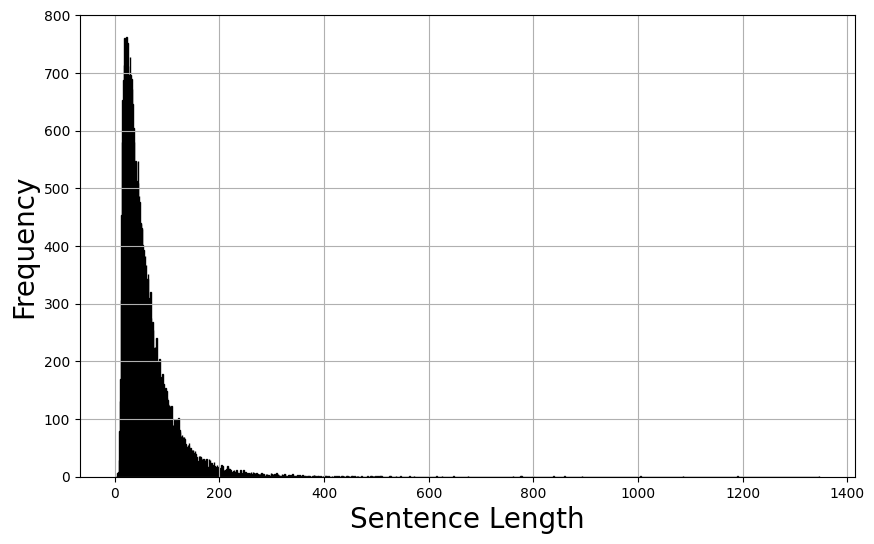

In [17]:
import matplotlib.pyplot as plt

df['text_length'] = df['text_bengali'].apply(len)

# Plot the frequency diagram
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=range(0, max(df['text_length']) + 1, 1), edgecolor='black')
# plt.title('Frequency Diagram of Sentence Lengths', fontsize=24)
plt.xlabel('Sentence Length', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.grid(True)
plt.show()

In [18]:
min_length = df['text_length'].min()
max_length = df['text_length'].max()

# filtered_df = df[ (df['text_length'] == min_length) | (df['text_length'] == max_length)]
filtered_df = df[(df['text_length'] == 1)]
filtered_df
# min_sentence = filtered_df[filtered_df['text_length'] == min_length]['text_bengali'].values[0]
# max_sentence = filtered_df[filtered_df['text_length'] == max_length]['text_bengali'].values[0]

# print("Sentence with minimum text length:", min_sentence)
# print("Sentence with maximum text length:", max_sentence)


,id,dataset,text_transliterated,text_bengali,text_length


In [19]:
df_filtered = df[df['text_bengali'].str.split().str.len() < 2]
df_filtered

,id,dataset,text_transliterated,text_bengali,text_length


In [20]:
df_final = df[df['text_bengali'].str.split().str.len() > 1]
df_final.shape

(42705, 5)

In [21]:
min_length = df_final['text_length'].min()
max_length = df_final['text_length'].max()

In [22]:
min_length, max_length, df_final['text_length'].mean()

(4, 1347, 58.28694532256176)

In [23]:
df_final['text_transliterated_length'] = df_final['text_transliterated'].apply(len)
df_final['text_transliterated_length'].min(), df_final['text_transliterated_length'].max(), df_final['text_transliterated_length'].mean()

(3, 1406, 59.249104320337196)

In [24]:
unique_words = set()
def count_word(sentence):
    words = str(sentence).split()
    l = len(words)
    for word in words:
        unique_words.add(word)
    return l
df_final['word_count_transliterated'] = df_final['text_transliterated'].apply(count_word)
print(len(unique_words))
unique_words = set()
df_final['word_count'] = df_final['text_bengali'].apply(count_word)
print(len(unique_words))

81848
60644


In [25]:
df_final['word_count'].min(), df_final['word_count'].max(), df_final['word_count'].mean()

(2, 226, 10.518440463645943)

In [26]:
df_final = df_final[df_final['word_count_transliterated'] > 1]
df_final

,id,dataset,text_transliterated,text_bengali,text_length,text_transliterated_length,word_count_transliterated,word_count
0,78c56009-fc89-4948-a1f5-c80ed6d6cf7a,penta_trickbd_external,Tnx bro ato sundor akta gift dewar jonno,থ্যাংক্স ব্রো এত সুন্দর একটা গিফট দেওয়ার জন্য,45,40,8,8
1,92120326-6b8e-4e7a-a96c-9afc86683c5a,penta_trickbd_external,hmm playstore upddate den,হুম প্লেস্টোর আপডেট দেন,23,25,4,4
2,048162d6-cbee-4f43-a3db-fb156b28bc60,penta_trickbd_external,"kahini ache, jane but korena……… kichu add korechi","কাহিনী আছে , জানে বাট করেনা ……… কিছু অ্যাড করেছি",48,49,8,10
3,562ed17e-16f1-4bd1-bdfe-5a33d4bf8075,penta_trickbd_external,kintu vai easy net to chole na. web tunnel. ot...,কিন্তু ভাই ইসি নেট তো চলে না। ওয়েব টানেল। অথবা...,201,198,39,39
4,8ea5a901-18cc-4444-bb93-26f80a78bb2a,penta_trickbd_external,apnar ta koto?,আপনার টা কত ?,13,14,3,4
...,...,...,...,...,...,...,...,...
42700,d51383a8-6fd4-40f7-a62a-365d5e1cefa5,penta_trickbd_external,bro ami google e search korei onek gulo websit...,ব্রো আমি গুগল এ সার্চ করেই অনেক গুলো ওয়েবসাইট ...,71,73,13,14
42701,6e3e8e41-dac1-4cfa-aaab-490844f5d680,penta_trickbd_external,Speed kmn r limit ace naki,স্পিড কেমন আর লিমিট আছে নাকি,28,26,6,6
42702,2d9ca33a-4158-48e3-84c1-59bd82d6f72f,penta_trickbd_external,"Daraz Refund korar somoy cashback, voucher sob...","দারাজ রিফান্ড করার সময় ক্যাশব্যাক , ভাউচার সব ...",91,92,14,17
42703,27514358-de84-4cec-8762-74e749e5c934,penta_trickbd_external,apni apnar id te diye search bar a likhun “con...,আপনি আপনার আইডি তে দিয়ে সার্চ বার এ লিখুন “কনফ...,140,139,27,27


In [27]:
df_final['word_count_transliterated'].min(), df_final['word_count_transliterated'].max(), df_final['word_count_transliterated'].mean()

(2, 212, 10.35309682706943)

In [28]:
df_final.drop(columns=['text_length', 'word_count_transliterated', 'word_count', 'text_transliterated_length'], inplace=True)

In [29]:
# len(df_final.text_bengali.unique())

In [30]:
# len(df_final.text_transliterated.unique())

In [31]:
df_test = df_final.iloc[:2500]
df_val = df_final.iloc[2500:4000]
df_train = df_final.iloc[4000:]

In [32]:
df_test.shape

(2500, 4)

In [33]:
df_test.head()

,id,dataset,text_transliterated,text_bengali
0,78c56009-fc89-4948-a1f5-c80ed6d6cf7a,penta_trickbd_external,Tnx bro ato sundor akta gift dewar jonno,থ্যাংক্স ব্রো এত সুন্দর একটা গিফট দেওয়ার জন্য
1,92120326-6b8e-4e7a-a96c-9afc86683c5a,penta_trickbd_external,hmm playstore upddate den,হুম প্লেস্টোর আপডেট দেন
2,048162d6-cbee-4f43-a3db-fb156b28bc60,penta_trickbd_external,"kahini ache, jane but korena……… kichu add korechi","কাহিনী আছে , জানে বাট করেনা ……… কিছু অ্যাড করেছি"
3,562ed17e-16f1-4bd1-bdfe-5a33d4bf8075,penta_trickbd_external,kintu vai easy net to chole na. web tunnel. ot...,কিন্তু ভাই ইসি নেট তো চলে না। ওয়েব টানেল। অথবা...
4,8ea5a901-18cc-4444-bb93-26f80a78bb2a,penta_trickbd_external,apnar ta koto?,আপনার টা কত ?


In [34]:
df_test.to_csv('test.csv', index=False)
df_train.to_csv('train.csv', index=False)
df_val.to_csv('val.csv', index=False)

In [35]:
df_final.to_csv('all_final.csv', index=False)

In [36]:
df_train.shape

(38705, 4)

In [37]:
df_final.dataset.value_counts()

dataset
penta_trickbd_external              27474
penta_trickbd_internal               8139
bhasha_abhijnaanam                   4153
springer_autobacktransliteration     2939
Name: count, dtype: int64

In [38]:
27475+8139

35614

In [39]:
df_final.shape

(42705, 4)

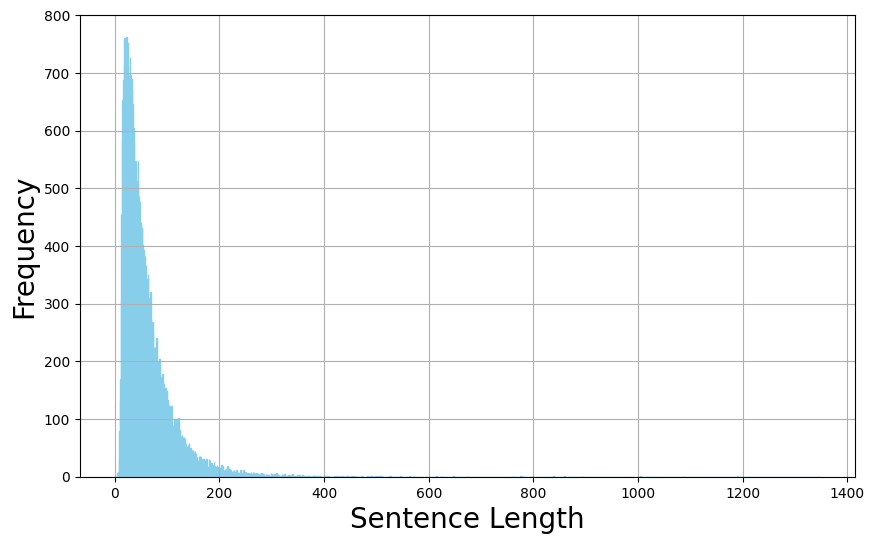

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe with text data is named 'df_final'

# Calculate text length (if not already done)
df_final['text_length'] = df_final['text_bengali'].apply(len)

# Define a list of colors for the histogram bars
colors = ['skyblue']  # You can adjust these colors

# Get the maximum text length
max_length = max(df_final['text_length']) + 1

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_final['text_length'], bins=range(0, max_length, 1), edgecolor='skyblue', color=colors)

# Customize the plot
plt.xlabel('Sentence Length', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.grid(True)

# Add a title (optional)
# plt.title('Distribution of Sentence Lengths in Bengali Text', fontsize=18)
plt.savefig('len_counts_plot.pdf', bbox_inches='tight')
plt.show()

In [41]:
print('hack' in 'hacking')

True


In [3]:
df_final = pd.read_csv("/kaggle/input/pentabd-transliteration-dataset-all-combined/all_final.csv")
df_final.shape

(42705, 5)

In [4]:
def make_type(sentence):
    l = []
    sentence = sentence.lower()
    if 'hack' in sentence:
        l.append('hacking')
    if ('help' in sentence) or ('hlp' in sentence):
        l.append('help')
    if ('plz' in sentence) or ('pls' in sentence):
        l.append('request')
    if ('thn' in sentence)  or ('thank' in sentence) or ('tnx' in sentence) or ('welcome' in sentence) or ('wlc' in sentence) or ('nice' in sentence) or ('good' in sentence) or ('gd' in sentence):
        l.append('appreciation')
    if ('faltu' in sentence):
        l.append('disapproval')
    if ('baccha' in sentence) or ('bacca' in sentence):
        l.append('offence')
    if ('facebook' in sentence) or ('fb' in sentence) or ('whatsapp' in sentence) or ('messenger' in sentence) or ('msngr' in sentence):
        l.append('social-media')
    if ('maf' in sentence) or ('maaf' in sentence) or ('sorry' in sentence):
        l.append('apology')
    if ('game' in sentence):
        l.append('gaming')
    if ('quran' in sentence) or ('allah' in sentence) or ('bible' in sentence):
        l.append('religious')
    if len(l) == 0:
        l.append('miscellaneous')
    
    return l

In [5]:
df_final['type'] = df_final['text_transliterated'].apply(make_type)

In [6]:
df_final.head()

,id,dataset,text_transliterated,text_bengali,type
0,78c56009-fc89-4948-a1f5-c80ed6d6cf7a,penta_trickbd_external,Tnx bro ato sundor akta gift dewar jonno,থ্যাংক্স ব্রো এত সুন্দর একটা গিফট দেওয়ার জন্য,[appreciation]
1,92120326-6b8e-4e7a-a96c-9afc86683c5a,penta_trickbd_external,hmm playstore upddate den,হুম প্লেস্টোর আপডেট দেন,[miscellaneous]
2,048162d6-cbee-4f43-a3db-fb156b28bc60,penta_trickbd_external,"kahini ache, jane but korena……… kichu add korechi","কাহিনী আছে , জানে বাট করেনা ……… কিছু অ্যাড করেছি",[miscellaneous]
3,562ed17e-16f1-4bd1-bdfe-5a33d4bf8075,penta_trickbd_external,kintu vai easy net to chole na. web tunnel. ot...,কিন্তু ভাই ইসি নেট তো চলে না। ওয়েব টানেল। অথবা...,[social-media]
4,8ea5a901-18cc-4444-bb93-26f80a78bb2a,penta_trickbd_external,apnar ta koto?,আপনার টা কত ?,[miscellaneous]


In [7]:
df_final.shape

(42705, 5)

In [8]:
# df_final.to_csv('all_final.csv', index=False)

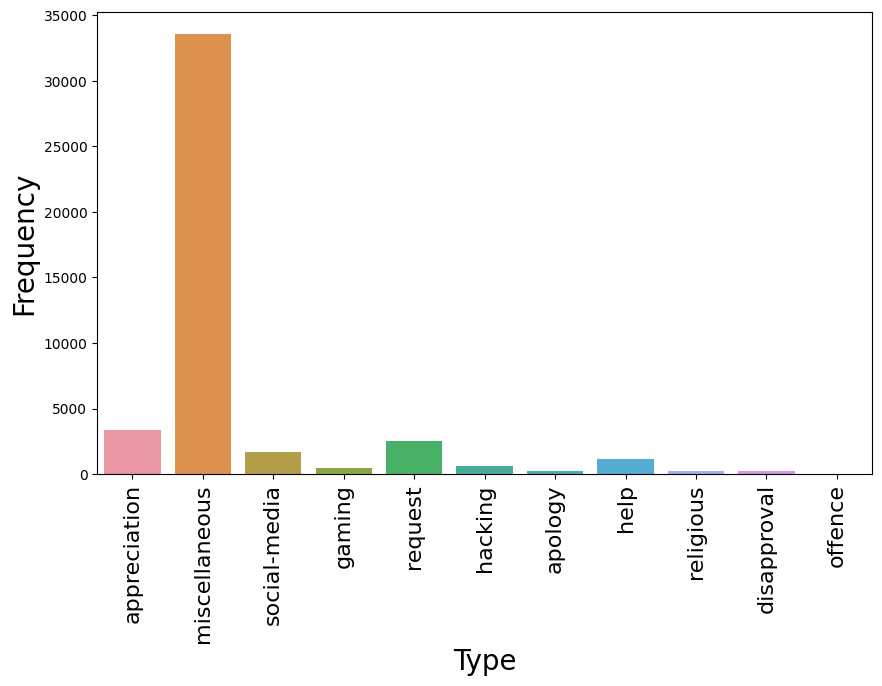

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Flatten the list of labels
all_labels = [label for sublist in df_final['type'] for label in sublist]

# Count the occurrences of each label
label_counts = Counter(all_labels)

# Convert the counts to a DataFrame for easier plotting
label_counts_df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['count']).reset_index()
label_counts_df = label_counts_df.rename(columns={'index': 'label'})

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='count', data=label_counts_df)
# plt.title('Text count')
plt.xlabel('Type', fontsize=20)
plt.xticks(rotation=90, fontsize=16)
plt.ylabel('Frequency', fontsize=20)
plt.savefig('type_counts_plot.pdf', bbox_inches='tight')
plt.show()

In [10]:
!pip install wordcloud

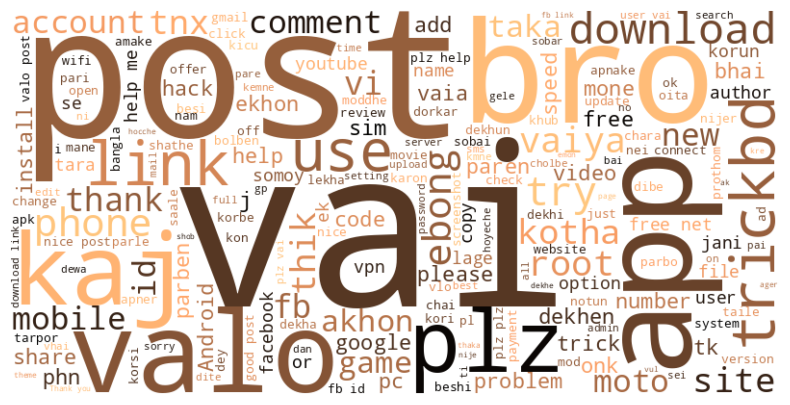

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def draw_wordcloud_transliterated(all_text, category):
    custom_stopwords = {'a', 'ki', 'kew', 'kivabe', 'hobe', 'apnar', 'ta', 'dia', 'ekti', 'na', 'er', 'r', 'kisu', 'pore', 'diya', 'ace', 'hmm', 'ektu', 'chole',
                       'tini', 'eta', 'but', 'mb', 'seta', 'ekta', 'akta', 'to', 'kono', 'kintu', 'koren', 'kore', 'korbo', 'korle', 'korte', 'tar', 'aita', 'hbe',
                       'keno', 'ei', 'o', 'ata', 'ke', 'diye', 'ar', 'sob', 'oi', 'nah', 'eita', 'por', 'sathe', 'kichu', 'holo', 'ektu', 'koi', 'te', 'korar',
                       'k', 'amar', 'ai', 'age', 'apni', 'ami', 'jonno', 'tahole', 'din', 'je', 'hoy', 'ra', 'amr', 'niye', 'tai', 'hoi', 'nai', 'chilo', 'abar',
                       'and', 'ba', 'kora', 'gula', 'theke', 'thake', 'ache', 'tobe', 'hoto', 'naki', 'jodi', 'onno', 'ja', 'lagbe', 'tader', 'ase', 'Rana', 'den',
                       'dile', 'aktu', 'jabe', 'korlam', 'jay', 'bole', 'pabo', 'kno', 'hoyna', 'kom', 'thakle', 'sm', 'e', 'onek', 'hole', 'jai' ,'koto', 'paben',
                       'so', 'vabe', 'disi', 'bt', 'gulo', 'keu', 'bolen', 'dibo', 'hoye', 'bar', 'korci', 'pawa', 'ato', 'jara', 'deya', 'amio', 'aro', 'diben', 'korben',
                       'koro'}

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap="copper",
        stopwords=custom_stopwords
    ).generate(all_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('transliterated_' + category + '_wordcloud.pdf', bbox_inches='tight')
    plt.show()
    
# categories = ['hacking', 'help', 'request', 'appreciation', 'disapproval', 'offence', 'social-media', 'apology', 'gaming', 'religious', 'miscellaneous']
# for category in categories:
#     all_text = ' '.join(df_final[df_final['type'].apply(lambda x: category in x)]['text_transliterated'])
#     draw_wordcloud_transliterated(all_text, category)
#     print(all_text)

all_text = ' '.join(df_final['text_transliterated'])
draw_wordcloud_transliterated(all_text, 'final')

In [14]:
punctuations = ',?।.!'
stopwords = {'পারবেন', 'কিভাবে', 'দেখি', 'কেমন', 'কেমনে', 'লাগবে', 'থাকলে', 'পারবো', 'দিবো', 'কেনো', 'লাগে', 'করছি', 'আগের', 'এক', 'চাই', 'একটা', 'আরো',
             'করব', 'টা', 'একটু', 'দিবেন', 'ইউস', 'আসে', 'করবো', 'বুঝলাম', 'দেয়া', 'করলাম', 'দিয়ে', 'হতো', 'কই', 'দেখেন', 'নিয়ে', 'দেয়', 'পাবেন',
             'দেখায়', 'দিন', 'কীভাবে', 'তে', 'এখনো', 'নাহ', 'ব্র', 'হয়ে', 'দিয়ে', 'এটা', 'এইটা', 'গুলা', 'হুম', 'মানে', 'পারলে', 'দিব', 'দিয়ে', 'বাট', 'পাবো',
             'দু', 'একটি', 'নিজের', 'তারৈ', 'আমি', 'ঐ', 'আপনি', 'করিয়ে', 'তত', 'জন্য', 'যখন', 'হত', 'সেটাও', 'করার', 'ওঁদের', 'শুধু', 'তাহার',
             'ওদের', 'দেওয়ার', 'নিজেই', 'আমার', 'দিলেন', 'ফিরে', 'গেলে', 'জানা', 'আপনার', 'তাঁর', 'উপর', 'তাকে', 'রয়েছে', 'যাকে', 'এঁরা', 'তাদের',
             'সেই', 'হবেন', 'কোনও', 'অনুযায়ী', 'যান', 'তাও', 'পরেও', 'গেছে', 'অবধি', 'কয়েকটি', 'কাছে', 'এটি', 'আগেই', 'এতটাই', 'হইয়া', 'যা', 'হৈলে',
             'আবার', 'তারা', 'সে', 'হয়েছে', 'সহিত', 'যাবে', 'তখন', 'গিয়েছে', 'দিয়ে', 'কিছুই', 'তবে', 'নিতে', 'রেখে', 'ই', 'সহ', 'যাঁরা', 'নানা', 'হলো',
             'যাঁর', 'তোমার', 'পর', 'ছাড়াও', 'করলে', 'যত', 'তবু', 'তিনিও', 'না', 'দেখতে', 'দেওয়া', 'থেকেও', 'কাজে', 'ক্ষেত্রে', 'কয়েক', 'হচ্ছে', 'হয়েছিল',
             'থেকেই', 'অথবা', 'সঙ্গেও', 'বদলে', 'দ্বারা', 'পক্ষে', 'গেল', 'বলতে', 'পাওয়া', 'কত', 'মধ্যে', 'বলা', 'জে', 'নেই', 'তাই', 'কি', 'সেটা', 'একে',
             'যেখানে', 'এত', 'হলেও', 'টি', 'করেই', 'করছে', 'হন', 'প্রায়', 'মধ্যভাগে', 'কারণ', 'এবার', 'করেছে', 'করেন', 'আর', 'যেন', 'নিজেদের', 'হয়েই',
             'নিজে', 'একবার', 'নাই', 'বাদে', 'যাতে', 'এর', 'ঠিক', 'তার', 'ও', 'পেয়ে', 'করলেন', 'মোট', 'ব্যাপারে', 'কাছ', 'করা', 'চেয়ে', 'কেউ', 'নাগাদ',
             'করি', 'বলেছেন', 'নেওয়ার', 'কাউকে', 'ভাবে', 'দিকে', 'তারপর', 'যেমন', 'ওখানে', 'খুব\tগুলি', 'অর্থাত', 'তো', 'ছিলেন', 'কোন', 'পারেন', 'হয়তো',
             'বরং', 'কেউই', 'জনকে', 'প্রভৃতি', 'দুটো', 'তাঁকে', 'এখন', 'অন্য', 'ওর', 'ছিল', 'ওকে', 'তুলে', 'দিয়েছে', 'জানানো', 'ওঁরা', 'এটাই', 'তুমি', 'করিতে',
             'তাহলে', 'দেন', 'বলে', 'যে', 'হলেই', 'এমনকী', 'হল', 'বহু', 'বলল', 'মধ্যেই', 'ধরে', 'তাঁদের', 'তেমন', 'আই', 'হইবে', 'তাহাতে', 'নেওয়া', 'যিনি',
             'এঁদের', 'অনেকে', 'হতে', 'কে', 'ধরা', 'হইতে', 'করায়', 'ব্যবহার', 'থাকে', 'বসে', 'থাকেন', 'থাকবে', 'স্বয়ং', 'এরা', 'দেয়', 'নিয়ে', 'কবে', 'সবার',
             'দেখে', 'চলে', 'যেতে', 'ইত্যাদি', 'সেখান', 'চান', 'অন্তত', 'হবে', 'সেটাই', 'পর্যন্ত', 'মাধ্যমে', 'এমন', 'ভাবেই', 'দিয়েছেন', 'ওরা', 'করে', 'তাতে', 'এবং',
             'এতে', 'ইহা', 'জন্যওজে', 'সুতরাং', 'আমাকে', 'বিশেষ', 'এসে', 'করতে', 'এখানেই', 'আমরা', 'কিন্তু', 'তিনি', 'বিনা', 'আজ', 'কারও', 'করিয়া', 'তা',
             'ছাড়া', 'থেকে', 'যারা', 'হয়', 'হওয়া', 'এল', 'মাত্র', 'ফের', 'জানতে', 'জানিয়ে', 'বললেন', 'মতোই', 'সাথে', 'কর', 'করেছেন', 'করবেন', 'হলে', 'নাকি',
             'সঙ্গে', 'আগামী', 'এখনও', 'তাঁাহারা', 'দিতে', 'তাঁরা', 'আগে', 'আমাদের', 'সেটি', 'বলেন', 'স্পষ্ট', 'কোনো', 'হোক', 'থাকবেন', 'জন', 'করছেন', 'অবশ্য',
             'গিয়ে', 'হয়নি', 'এখানে', 'করবে', 'কিছু', 'হওয়ায়', 'কখনও', 'যাদের', 'বার', 'হয়ে', 'পারি', 'জানিয়েছে', 'আদ্যভাগে', 'আরও', 'মতো', 'যায়', 'যাওয়ার',
             'কিংবা', 'যদি', 'পরেই', 'জনের', 'হিসাবে', 'এস', 'দুটি', 'জানায়', 'গোটা', 'যাওয়া', 'তথা', 'সমস্ত', 'যদিও', 'করাই', 'হতেই', 'হয়েছেন', 'নয়', 'রকম',
             'অনেক', 'করেছিলেন', 'উপরে', 'এ', 'এদের', 'উনি', 'হয়', 'সব', 'পরে', 'প্রতি', 'যার', 'মধ্যেও', 'মোটেই', 'এই', 'বা', 'বেশ', 'পারে', 'যতটা', 'অনেকেই',
             'যাচ্ছে', 'অথচ', 'অতএব', 'একই', 'দেখা', 'চায়', 'আছে', 'থাকায়', 'যথেষ্ট', 'কী', 'তাহা', 'রাখা', 'ওঁর', 'সেখানে', 'সম্প্রতি', 'তিনঐ', 'উচিত', 'হওয়ার',
             'ফলে', 'ওই', 'কেন', 'থাকা', 'এটা'}

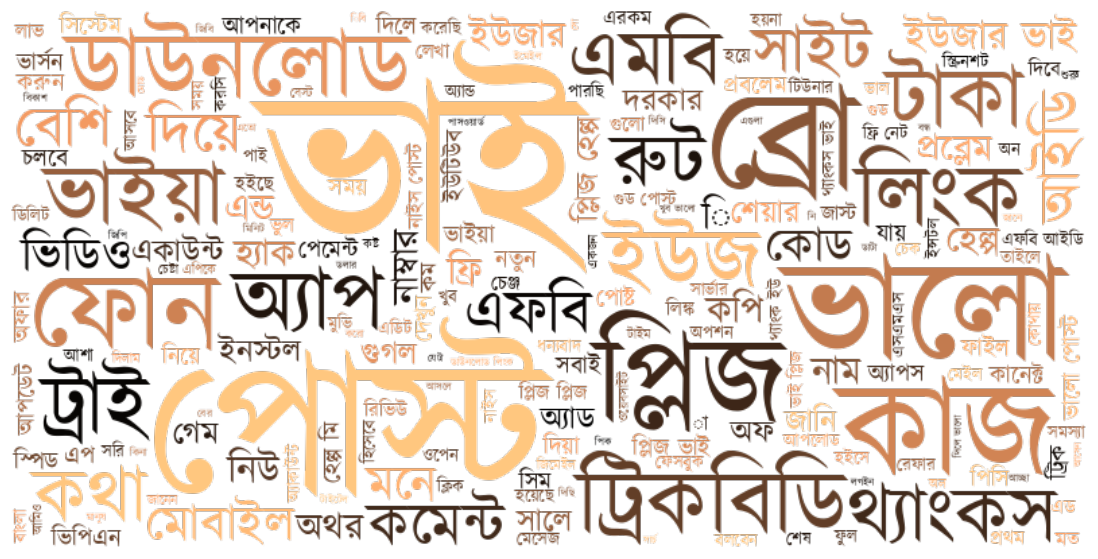

In [16]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def clean(text):
    text = re.sub('[%s]' % re.escape(punctuations), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\xa0', '', text)
    return text

def draw_wordcloud_bengali(cleaned_text, category):
    refined_sentence = " ".join(cleaned_text)

    regex = r"[\u0980-\u09FF]+"
    wc = WordCloud(width=800, height=400,mode="RGBA",background_color=None,colormap="copper",stopwords = stopwords,
    font_path="/kaggle/input/bangla-fonts/kalpurush.ttf",regexp=regex).generate(refined_sentence)
    plt.figure(figsize=(15, 7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('bengali_' + category + '_wordcloud.pdf', bbox_inches='tight')
    plt.show()

# categories = ['hacking', 'help', 'request', 'appreciation', 'disapproval', 'offence', 'social-media', 'apology', 'gaming', 'religious', 'miscellaneous']
# for category in categories:
#     cleaned_text = df_final[df_final['type'].apply(lambda x: category in x)]['text_bengali'].apply(lambda x: clean(str(x)))
#     draw_wordcloud_bengali(cleaned_text, category)

cleaned_text = df_final['text_bengali'].apply(lambda x: clean(str(x)))
draw_wordcloud_bengali(cleaned_text, 'final')

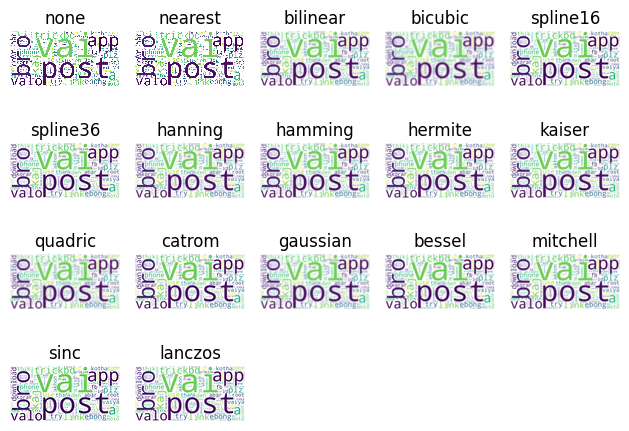

In [267]:
# Try different interpolation methods
interpolation_methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

for i, method in enumerate(interpolation_methods):
    plt.subplot(4, 5, i+1)
    plt.imshow(wordcloud, interpolation=method)
    plt.title(method)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [36]:
!pip install kaleido -q

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import re

In [41]:
# category_counts_df = df_final.type.value_counts().reset_index()
# category_counts_df.columns = ['Category', 'Count']
# category_counts_df

categories_dict = {'hacking': 0, 'help': 0, 'request': 0, 'appreciation': 0, 'disapproval': 0, 'offence': 0, 'social-media': 0, 'apology': 0, 'gaming': 0, 'religious': 0, 'miscellaneous': 0}
for types in df_final['type']:
    for type in types:
        categories_dict[type]+=1

In [42]:
categories_dict

{'hacking': 580,
 'help': 1133,
 'request': 2560,
 'appreciation': 3328,
 'disapproval': 214,
 'offence': 42,
 'social-media': 1721,
 'apology': 265,
 'gaming': 464,
 'religious': 274,
 'miscellaneous': 33555}

In [50]:
sorted_categories_dict = sorted(categories_dict.items(), key=lambda x:x[1], reverse=True)
sorted_categories_dict = dict(sorted_categories_dict)
sorted_categories_dict

{'miscellaneous': 33555,
 'appreciation': 3328,
 'request': 2560,
 'social-media': 1721,
 'help': 1133,
 'hacking': 580,
 'gaming': 464,
 'religious': 274,
 'apology': 265,
 'disapproval': 214,
 'offence': 42}

In [52]:
import plotly.graph_objects as go

labels = list(sorted_categories_dict.keys())
values = list(sorted_categories_dict.values())

colors = px.colors.qualitative.Prism

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, 
    hole=.5, 
    marker=dict(colors=colors)
)])

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
    legend=dict(
        orientation="v",
        x=0.9,  # Position legend to the right of the pie chart
        y=0.5,
        xanchor="left",
        yanchor="middle"
    )
)
fig.show()

In [53]:
pio.write_image(fig, 'donut_chart.svg')

In [277]:
from collections import Counter

cleaned_text = df_train['text_bengali'].apply(lambda x: clean(str(x)))
refined_sentence = " ".join(cleaned_text)

word_list = refined_sentence.split()

word_counts = Counter(word_list)

top_20_most_frequent = word_counts.most_common(25)
top_20_least_frequent = word_counts.most_common()[:-26:-1]

print("Top 20 Most Frequent Words:")
for word, count in top_20_most_frequent:
    print(f"{word}: {count}")

print("\nTop 20 Least Frequent Words:")
for word, count in top_20_least_frequent:
    print(f"{word}: {count}")

Top 20 Most Frequent Words:
ভাই: 7176
না: 6631
পোস্ট: 5360
এর: 4560
কি: 4512
এ: 4488
করে: 4281
আমি: 3299
আমার: 2967
টা: 2904
প্লিজ: 2805
আর: 2583
হবে: 2539
এই: 2512
ভালো: 2413
করতে: 2402
তো: 2380
আপনার: 2188
থেকে: 2053
করেন: 2005
ব্রো: 1897
করা: 1878
আপনি: 1867
জন্য: 1847
দিয়ে: 1811

Top 20 Least Frequent Words:
আইডি”: 1
“কনফার্ম: 1
“”কিলোগ্গার””: 1
ফেক্সি: 1
*এমাউন্ট: 1
**নাম্বার: 1
খুজতিসিলাম: 1
আফনার: 1
প্রবাবলি: 1
কুকয়েন: 1
যায়মোবাইল: 1
অ্যান্ড্রইড: 1
ডোগেকয়েন: 1
লললললল: 1
বানাসি: 1
অ্যানিওয়ে: 1
বাড়তেও: 1
হারাতেও: 1
মার্কা…: 1
আমনের: 1
করতে…এমনে: 1
ডিটেলে: 1
পদ্মতি: 1
গেলারি: 1
ম্যাগপ্র: 1


In [278]:
cleaned_text = df_test['text_bengali'].apply(lambda x: clean(str(x)))
refined_sentence = " ".join(cleaned_text)

word_list = refined_sentence.split()

word_counts = Counter(word_list)

top_20_most_frequent = word_counts.most_common(25)
top_20_least_frequent = word_counts.most_common()[:-26:-1]

print("Top 20 Most Frequent Words:")
for word, count in top_20_most_frequent:
    print(f"{word}: {count}")

print("\nTop 20 Least Frequent Words:")
for word, count in top_20_least_frequent:
    print(f"{word}: {count}")

Top 20 Most Frequent Words:
ভাই: 564
না: 536
পোস্ট: 439
কি: 331
এর: 287
করে: 283
প্লিজ: 246
আমি: 243
এ: 242
হবে: 227
…: 221
আপনার: 202
আমার: 201
ব্রো: 198
আর: 192
তো: 182
করতে: 176
ভালো: 164
টা: 158
আছে: 154
একটা: 147
নাই: 135
করেন: 134
আপনি: 131
এই: 130

Top 20 Least Frequent Words:
রুট@অ্যান্ড্রয়েড-নট: 1
ভিজিট: 1
ডমিন+: 1
আওয়েটিং: 1
টেকনিক্যাল: 1
বঝতে: 1
ব্রাউসারের: 1
বুঝামু: 1
ফাজলামোর: 1
নেওয়ার: 1
card: 1
site: 1
scam: 1
ওয়ার্ডপ্রেস: 1
সাইনআপ: 1
বাইথোস্টডটকম: 1
হতাশ: 1
রেট: 1
রাইটার: 1
জোর: 1
এবিলিটি: 1
রিডার: 1
চেয়ে: 1
মতলব: 1
সেষ: 1


In [279]:
cleaned_text = df_val['text_bengali'].apply(lambda x: clean(str(x)))
refined_sentence = " ".join(cleaned_text)

word_list = refined_sentence.split()

word_counts = Counter(word_list)

top_20_most_frequent = word_counts.most_common(25)
top_20_least_frequent = word_counts.most_common()[:-26:-1]

print("Top 20 Most Frequent Words:")
for word, count in top_20_most_frequent:
    print(f"{word}: {count}")

print("\nTop 20 Least Frequent Words:")
for word, count in top_20_least_frequent:
    print(f"{word}: {count}")

Top 20 Most Frequent Words:
ভাই: 368
না: 324
কি: 206
প্লিজ: 204
পোস্ট: 197
করে: 150
আমি: 143
আমার: 136
ব্রো: 126
দিয়ে: 117
ভালো: 116
আর: 115
আছে: 110
এর: 110
হবে: 110
এটা: 109
তো: 108
কোন: 105
করতে: 103
হয়: 102
ইউজার: 101
আপনার: 99
কিভাবে: 99
এই: 89
করেন: 88

Top 20 Least Frequent Words:
আপটু: 1
ওএস:: 1
(ইউজার): 1
সমস্যার: 1
জীবন: 1
কপির: 1
সিম্বিয়ান: 1
এক্সইপি: 1
রাম: 1
জিএম: 1
চেয়েও: 1
শোনা: 1
লাইভে: 1
বিরে: 1
মার্কস: 1
-%: 1
ইনশাআল্লাহ: 1
সক্রিপ্টের: 1
এরর্: 1
ইন্টারনেট: 1
সত্বেও: 1
কয়েকদিন: 1
মডেম: 1
ভুগছি: 1
অ্যলইউএ-: 1


In [280]:
cleaned_text = df_train['text_transliterated'].apply(lambda x: clean(str(x)))
refined_sentence = " ".join(cleaned_text)

word_list = refined_sentence.split()

word_counts = Counter(word_list)

top_20_most_frequent = word_counts.most_common(25)
top_20_least_frequent = word_counts.most_common()[:-26:-1]

print("Top 20 Most Frequent Words:")
for word, count in top_20_most_frequent:
    print(f"{word}: {count}")

print("\nTop 20 Least Frequent Words:")
for word, count in top_20_least_frequent:
    print(f"{word}: {count}")

Top 20 Most Frequent Words:
na: 5486
post: 5109
ki: 4319
er: 3840
vai: 3816
ta: 3642
kore: 3556
e: 2725
a: 2572
ami: 2258
to: 2114
korte: 1988
kora: 1868
hobe: 1821
hoy: 1820
valo: 1788
o: 1705
ar: 1677
theke: 1676
koren: 1653
amar: 1583
plz: 1549
diye: 1518
te: 1495
link: 1495

Top 20 Least Frequent Words:
otatey: 1
id”: 1
“confirm: 1
kore…post: 1
Refund: 1
hotoplz: 1
tahol: 1
likhun…: 1
“”keyloggar””: 1
pin#: 1
**number*amount*: 1
porrhonto: 1
daua: 1
picr: 1
kotobar…………: 1
paisi…but: 1
afnar: 1
ditechen: 1
Titale: 1
bro…tau: 1
sotti………: 1
Hea: 1
ADB: 1
Kucoin: 1
Kunta: 1


In [281]:
cleaned_text = df_test['text_transliterated'].apply(lambda x: clean(str(x)))
refined_sentence = " ".join(cleaned_text)

word_list = refined_sentence.split()

word_counts = Counter(word_list)

top_20_most_frequent = word_counts.most_common(25)
top_20_least_frequent = word_counts.most_common()[:-26:-1]

print("Top 20 Most Frequent Words:")
for word, count in top_20_most_frequent:
    print(f"{word}: {count}")

print("\nTop 20 Least Frequent Words:")
for word, count in top_20_least_frequent:
    print(f"{word}: {count}")

Top 20 Most Frequent Words:
post: 414
na: 410
ki: 297
vai: 289
er: 271
ta: 248
kore: 215
e: 202
a: 188
to: 165
ami: 159
hobe: 151
korte: 138
valo: 132
plz: 126
ar: 123
bro: 114
apnar: 114
diye: 113
kora: 112
te: 111
korbo: 109
nai: 109
kaj: 103
link: 100

Top 20 Least Frequent Words:
baseki: 1
root@android: 1
press: 1
Vie: 1
common…: 1
jani…eta: 1
domain+hosting: 1
dekhacc…: 1
technical: 1
bojte: 1
mome: 1
Delhe: 1
Eikhane: 1
bujhamu: 1
Mygp: 1
fajlamur: 1
gase: 1
nayar: 1
Redotpay: 1
Sorryjader: 1
jacchena: 1
byethostcom: 1
……help: 1
…korte: 1
koreche…apni: 1


In [282]:
cleaned_text = df_val['text_transliterated'].apply(lambda x: clean(str(x)))
refined_sentence = " ".join(cleaned_text)

word_list = refined_sentence.split()

word_counts = Counter(word_list)

top_20_most_frequent = word_counts.most_common(25)
top_20_least_frequent = word_counts.most_common()[:-26:-1]

print("Top 20 Most Frequent Words:")
for word, count in top_20_most_frequent:
    print(f"{word}: {count}")

print("\nTop 20 Least Frequent Words:")
for word, count in top_20_least_frequent:
    print(f"{word}: {count}")

Top 20 Most Frequent Words:
na: 213
post: 211
ki: 207
vai: 193
er: 170
ta: 153
e: 124
kore: 112
to: 105
a: 102
plz: 93
ami: 90
korte: 80
ar: 79
valo: 79
jonno: 76
diye: 75
Vai: 73
hobe: 72
kora: 69
korbo: 69
bro: 68
te: 68
apnar: 63
kivabe: 61

Top 20 Least Frequent Words:
noughat: 1
pure: 1
os:: 1
FbMe/: 1
Somvob: 1
Bola: 1
Korun: 1
Inbox: 1
Saha): 1
Somadhan(Sumon: 1
Somossar: 1
Jibon: 1
Copied: 1
symbian: 1
korien: 1
krbn: 1
thn: 1
xcp: 1
kuv: 1
bolunplz: 1
takly: 1
gm: 1
kaccy: 1
dnld: 1
yutbe: 1


In [ ]:
def make_type(sentence):
    l = []
    sentence = sentence.lower()
    if 'hack' in sentence:
        l.append('hacking')
    if ('help' in sentence) or ('hlp' in sentence):
        l.append('help')
    if ('plz' in sentence) or ('pls' in sentence):
        l.append('request')
    if ('thn' in sentence)  or ('thank' in sentence) or ('tnx' in sentence) or ('welcome' in sentence) or ('wlc' in sentence) or ('nice' in sentence) or ('good' in sentence) or ('gd' in sentence):
        l.append('appreciation')
    if ('faltu' in sentence):
        l.append('disapproval')
    if ('baccha' in sentence) or ('bacca' in sentence):
        l.append('offence')
    if ('facebook' in sentence) or ('fb' in sentence) or ('whatsapp' in sentence) or ('messenger' in sentence) or ('msngr' in sentence):
        l.append('social-media')
    if ('maf' in sentence) or ('maaf' in sentence) or ('sorry' in sentence):
        l.append('apology')
    if ('game' in sentence):
        l.append('gaming')
    if ('quran' in sentence) or ('allah' in sentence) or ('bible' in sentence):
        l.append('religious')
    if len(l) == 0:
        l.append('miscellaneous')
    
    return l

In [2]:
import pandas as pd

df_nmt_test = pd.read_csv('/kaggle/input/nmt-fabiha-output/df_nmt_test.csv')
df_nmt_test['type'] = df_nmt_test['text_transliterated'].apply(make_type)

In [3]:
df_nmt_test.head()

,id,dataset,text_transliterated,text_bengali,normalized_bengali,predictions,type
0,f5afeacc-e452-497d-80d4-daf5c3238368,penta_trickbd_external,oi mia watermark a click korle subscribe hobe ...,ঐ মিয়া ওয়াটারমার্ক এ ক্লিক করলে সাবস্ক্রাইব হব...,ঐ মিয়া ওয়াটারমার্ক এ ক্লিক করলে সাবস্ক্রাইব ...,ওই মিয়া ওয়াটারমার্ক এ ক্লিক করলে সাবস্ক্রাই...,[miscellaneous]
1,14a899f1-e09d-4fc2-ad2d-f92075d5992a,penta_trickbd_external,Eta niyeo post korte hoy??,ফ্লাট নিয়েও পোস্ট করতে হয়??,ফ্লাট নিয়েও পোস্ট করতে হয়??,এটা নিয়েও পোস্ট করতে হয়??,[miscellaneous]
2,379c0d55-c07f-4832-8f88-686640233377,penta_trickbd_external,flat style bar indicator.apk diye,ফ্লাট স্টাইল indicator.apk দিয়ে,ফ্লাট স্টাইল indicator.apk দিয়ে,ফ্ল্যাট স্টাইল বার ইন্ডিকেটর।এপিকে দিয়ে,[miscellaneous]
3,5988a6d1-0bbc-453e-a93f-9e34294f6c09,penta_trickbd_external,ekhane gia ager adress copy kore abar kaj korr...,এখানে গিয়ে আগের অ্যাডরেস কপি করে আবার কাজ করতে...,এখানে গিয়ে আগের অ্যাডরেস কপি করে আবার কাজ করত...,এখানে গিয়া আগের অ্যাড্রেস কপি করে আবার কাজ ক...,[miscellaneous]
4,9f505ba3-ec5f-442c-8e9e-f98d0062c27d,penta_trickbd_external,background pic select kore save korle protol n...,ব্যাকগ্রাউণ্ড পিক সিলেক্ট করে সেভ করলে প্রটোল ...,ব্যাকগ্রাউণ্ড পিক সিলেক্ট করে সেভ করলে প্রটোল ...,ব্যাকগ্রাউন্ড পিক সিলেক্ট করে সেভ করলে প্রোফা...,[miscellaneous]


In [5]:
from collections import Counter

all_labels = [label for sublist in df_nmt_test['type'] for label in sublist]

# Count the occurrences of each label
label_counts = Counter(all_labels)

# Convert the counts to a DataFrame for easier plotting
label_counts_df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['count']).reset_index()
label_counts_df = label_counts_df.rename(columns={'index': 'label'})
label_counts_df

,label,count
0,miscellaneous,1926
1,appreciation,219
2,social-media,122
3,hacking,30
4,request,151
5,gaming,26
6,help,66
7,religious,18
8,apology,11
9,disapproval,12


In [6]:
df_nmt_test.to_csv("df_nmt_test_type.csv", index=False)